## Seaborn

### 01.Seaborn简介

https://seaborn.pydata.org/#

#### 1.安装

In [26]:
pip install seaborn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Note: you may need to restart the kernel to use updated packages.


| 特点           | Matplotlib                                      | Seaborn                                      |
|----------------|------------------------------------------------|---------------------------------------------|
| **易用性**     | 需要更多的代码和配置，灵活性高                 | 简单易用，自动生成漂亮的图表                |
| **默认样式**   | 默认样式简洁，需要手动调整                     | 默认样式美观，适合展示                      |
| **图表类型**   | 支持基础图表（折线图、柱状图、散点图等）       | 专注于统计图表（箱线图、热力图、成对关系图等） |
| **定制化程度** | 高度可定制，控制图表的每个细节                 | 提供少量定制选项，主要用于快速绘图          |
| **数据支持**   | 与 NumPy、Pandas 等库良好配合                  | 特别适合与 Pandas 配合，自动处理标签和索引   |
| **学习曲线**   | 较陡峭，需要掌握更多细节                       | 更容易上手，适合快速绘图                    |
| **美观性**     | 默认图表比较朴素，需要手动美化                 | 图表更美观，适合快速生成美观的统计图        |

### 02.基础绘图

| 功能               | 语法                                      | 描述                                                                 | 常用参数                                                                 |
|--------------------|------------------------------------------|---------------------------------------------------------------------|--------------------------------------------------------------------------|
| **散点图**         | `sns.scatterplot(x='col1', y='col2', data=df)` | 展示两个数值变量之间的关系                                         | `x`, `y`: 数据列<br>`hue`: 分类变量<br>`style`: 点样式                   |
| **折线图**         | `sns.lineplot(x='col1', y='col2', data=df)` | 展示数据随时间变化的趋势                                           | `x`, `y`: 数据列<br>`hue`: 分组<br>`style`: 线条样式                    |
| **直方图**         | `sns.histplot(data, bins=10, kde=True)` | 展示数据分布频率                                                   | `data`: 数据源<br>`bins`: 分箱数<br>`kde`: 是否添加核密度估计            |
| **核密度估计图**   | `sns.kdeplot(data)`                     | 展示数据概率密度分布                                               | `shade`: 填充曲线<br>`bw_adjust`: 带宽调整                              |
| **箱线图**         | `sns.boxplot(x='category', y='value', data=df)` | 展示数据分布（四分位数/中位数/离群点）                            | `x`, `y`: 分类和数值变量<br>`hue`: 分组<br>`orient`: 轴方向             |
| **条形图**         | `sns.barplot(x='category', y='value', data=df)` | 展示分类数据统计量                                                 | `x`, `y`: 分类和数值变量<br>`hue`: 分组<br>`ci`: 置信区间               |
| **小提琴图**       | `sns.violinplot(x='category', y='value', data=df)` | 结合箱线图和核密度估计展示分布形态                                 | `x`, `y`: 分类和数值变量<br>`hue`: 分组<br>`split`: 是否分开            |
| **分类散点图**     | `sns.stripplot(x='category', y='value', data=df, jitter=True)` | 展示分类变量与数值变量的分布                                       | `x`, `y`: 分类和数值变量<br>`jitter`: 点偏移控制                        |
| **回归图**         | `sns.regplot(x='col1', y='col2', data=df)` | 展示数据点与回归线                                                 | `x`, `y`: 数据列<br>`line_kws`: 回归线样式<br>`scatter_kws`: 散点样式   |
| **条形分布图**     | `sns.countplot(x='column', data=df)`     | 展示分类数据频数分布                                               | `x`: 分类变量<br>`hue`: 分组<br>`orient`: 轴方向                        |

#### 散点图

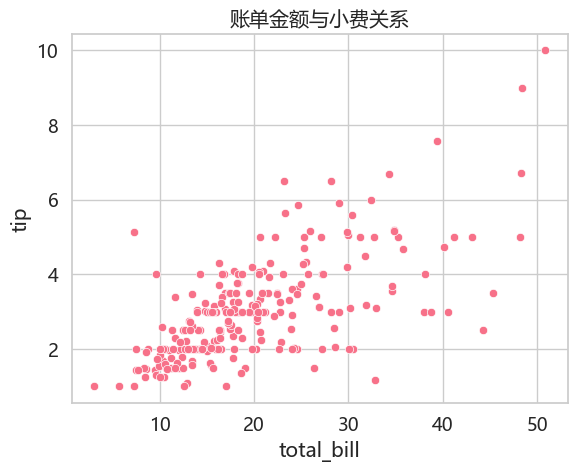

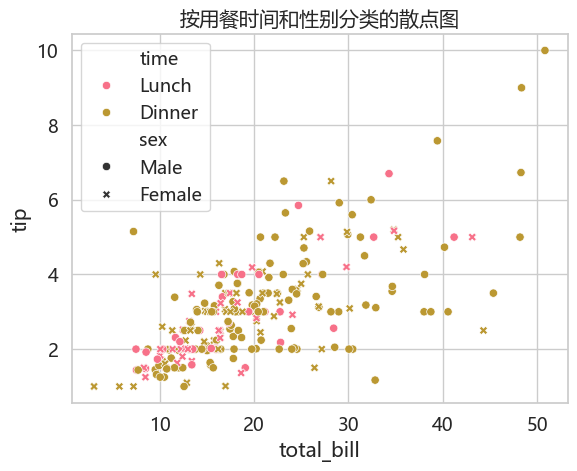

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据集
tips = sns.load_dataset("tips")

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制基础散点图
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("账单金额与小费关系")
plt.show()

# 添加分类变量
sns.scatterplot(x="total_bill", y="tip", hue="time", 
                style="sex", data=tips)
plt.title("按用餐时间和性别分类的散点图")
plt.show()

#### 折线图

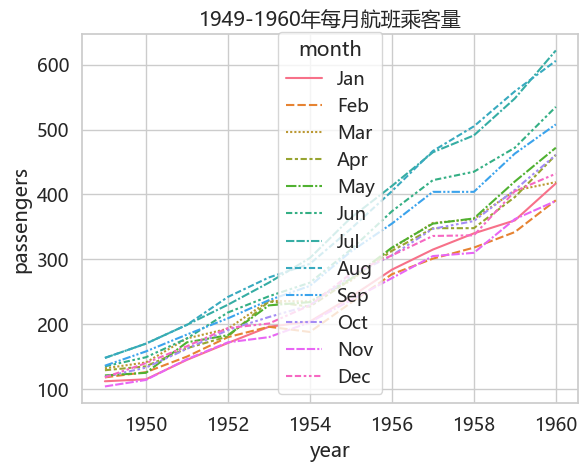

In [28]:
# 加载时间序列数据
flights = sns.load_dataset("flights")
may_flights = flights.query("month == 'May'")

# 绘制折线图
sns.lineplot(x="year", y="passengers", 
             hue="month", style="month",
             data=flights)
plt.title("1949-1960年每月航班乘客量")
plt.show()

#### 直方图

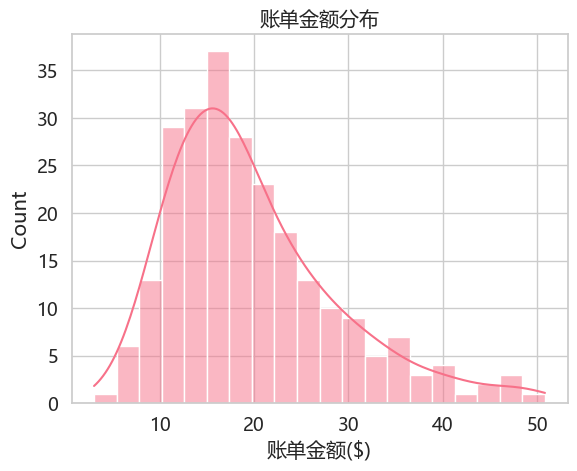

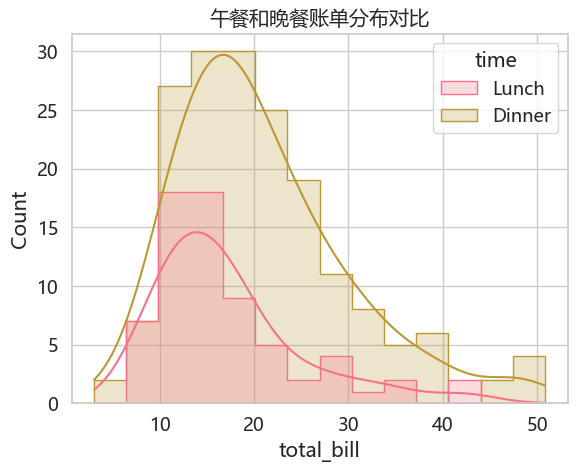

In [29]:
# 绘制带KDE的直方图
sns.histplot(tips["total_bill"], bins=20, kde=True)
plt.title("账单金额分布")
plt.xlabel("账单金额($)")
plt.show()

# 分组直方图
sns.histplot(data=tips, x="total_bill", hue="time", 
             element="step", kde=True)
plt.title("午餐和晚餐账单分布对比")
plt.show()

#### 核密度估计图(KDE)

C:\Users\Admin\AppData\Local\Temp\ipykernel_46188\896147321.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tips, x="total_bill", shade=True)


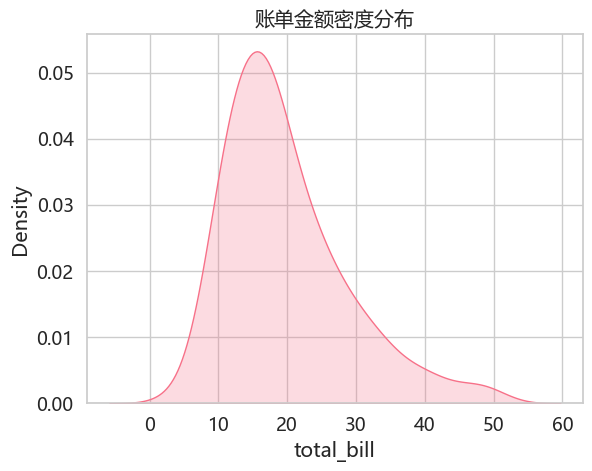

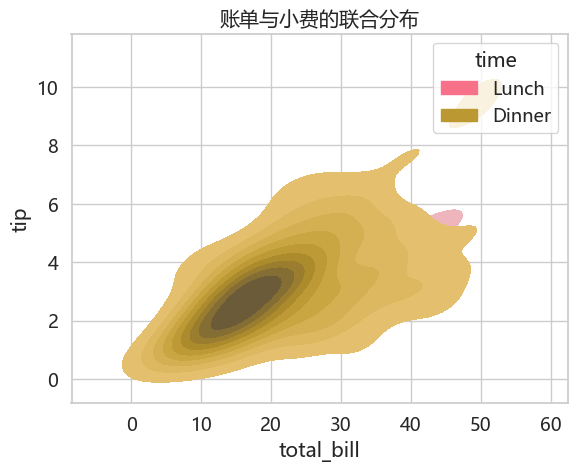

In [30]:
# 绘制基础KDE图
sns.kdeplot(data=tips, x="total_bill", shade=True)
plt.title("账单金额密度分布")
plt.show()

# 多变量KDE
sns.kdeplot(data=tips, x="total_bill", y="tip", 
            hue="time", fill=True)
plt.title("账单与小费的联合分布")
plt.show()

#### 箱线图

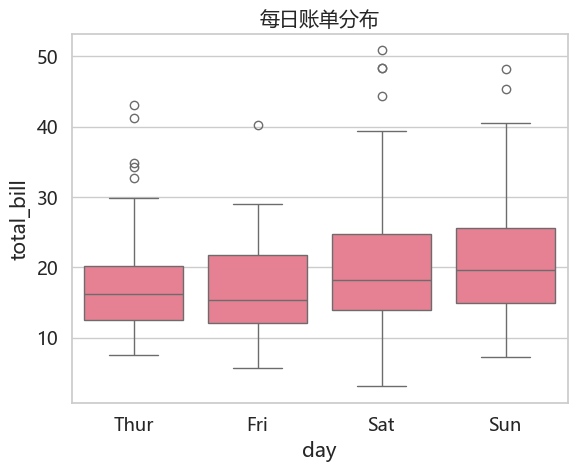

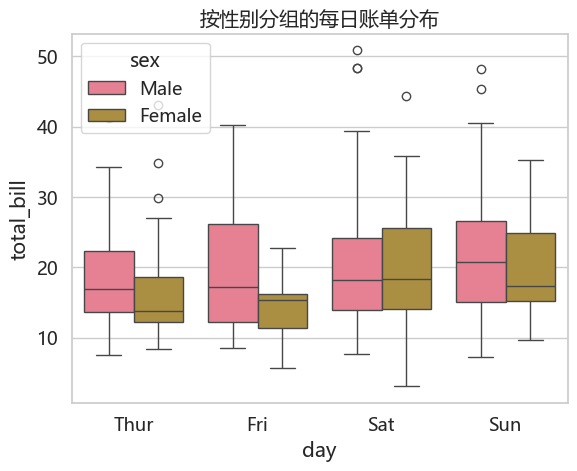

In [31]:
# 基础箱线图
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("每日账单分布")
plt.show()

# 分组箱线图
sns.boxplot(x="day", y="total_bill", hue="sex",
            data=tips)
plt.title("按性别分组的每日账单分布")
plt.show()

#### 条形图

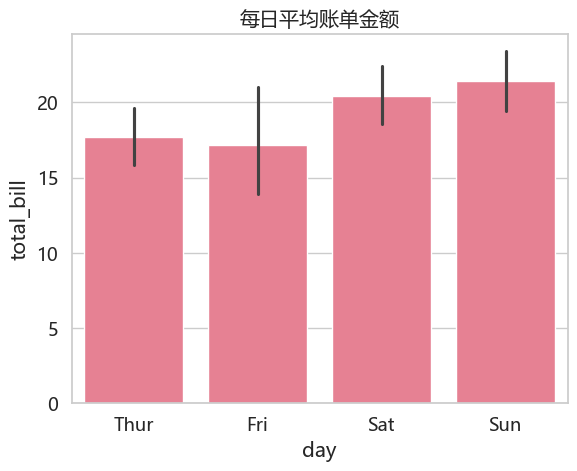

C:\Users\Admin\AppData\Local\Temp\ipykernel_46188\929064119.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="day", y="total_bill", hue="sex",


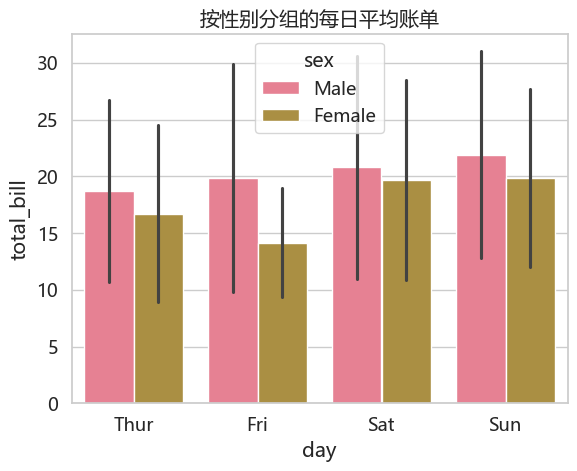

In [32]:
# 基础条形图
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("每日平均账单金额")
plt.show()

# 分组条形图
sns.barplot(x="day", y="total_bill", hue="sex",
            data=tips, ci="sd")  # 使用标准差代替置信区间
plt.title("按性别分组的每日平均账单")
plt.show()

#### 小提琴图

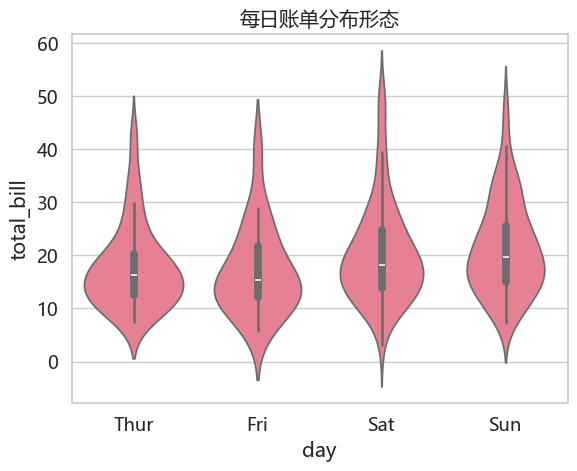

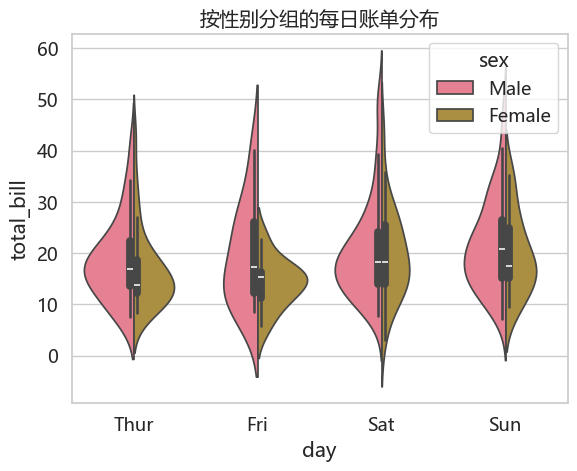

In [33]:
# 基础小提琴图
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("每日账单分布形态")
plt.show()

# 分组小提琴图
sns.violinplot(x="day", y="total_bill", hue="sex",
               data=tips, split=True)
plt.title("按性别分组的每日账单分布")
plt.show()

#### 分类散点图

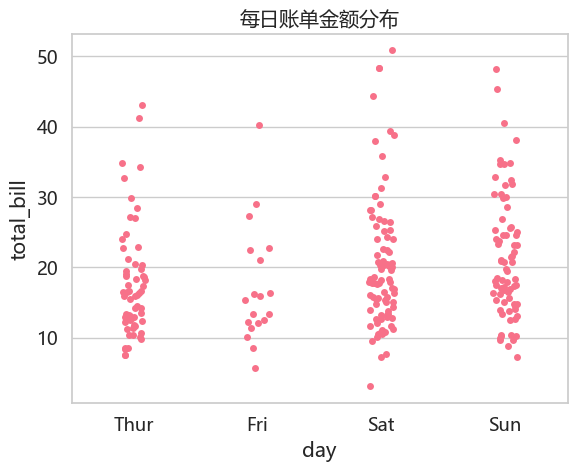

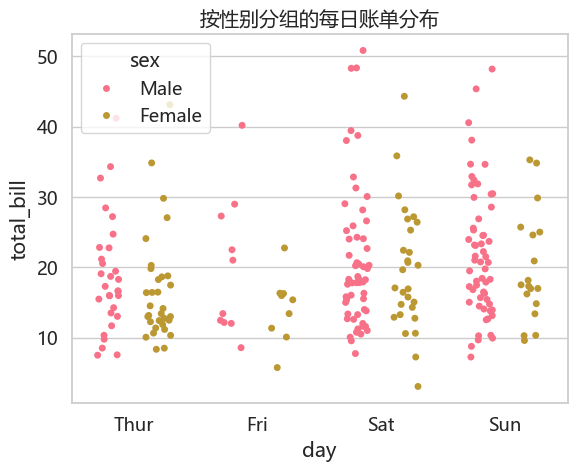

In [34]:
# 基础分类散点图
sns.stripplot(x="day", y="total_bill", data=tips)
plt.title("每日账单金额分布")
plt.show()

# 添加抖动效果
sns.stripplot(x="day", y="total_bill", data=tips,
              jitter=0.2, hue="sex", dodge=True)
plt.title("按性别分组的每日账单分布")
plt.show()

#### 回归图

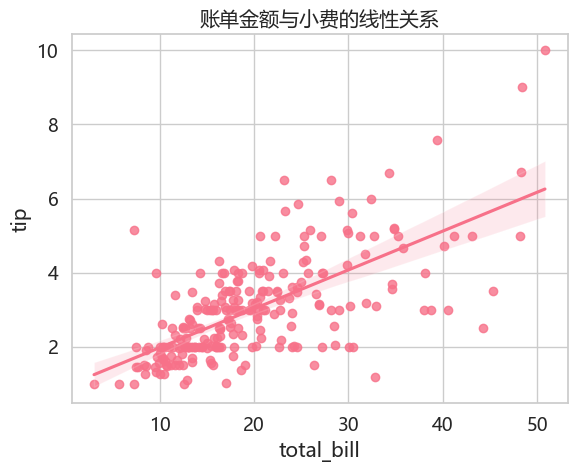

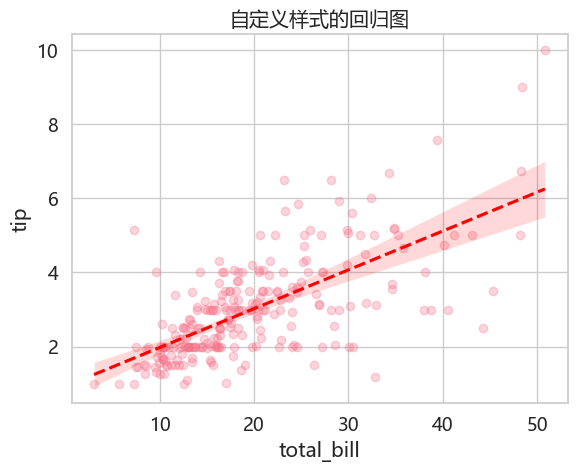

In [35]:
# 基础回归图
sns.regplot(x="total_bill", y="tip", data=tips)
plt.title("账单金额与小费的线性关系")
plt.show()

# 自定义回归线样式
sns.regplot(x="total_bill", y="tip", data=tips,
            line_kws={"color":"red", "linestyle":"--"},
            scatter_kws={"alpha":0.3})
plt.title("自定义样式的回归图")
plt.show()

#### 条形分布图

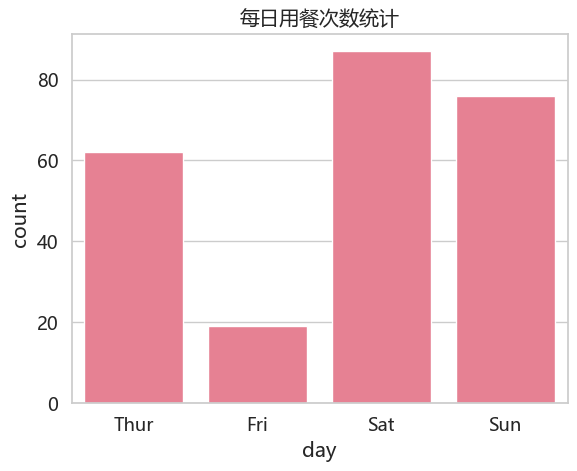

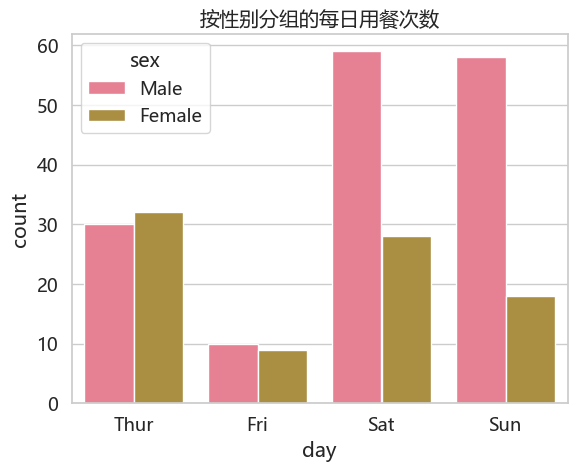

In [36]:
# 基础计数图
sns.countplot(x="day", data=tips)
plt.title("每日用餐次数统计")
plt.show()

# 分组计数图
sns.countplot(x="day", hue="sex", data=tips)
plt.title("按性别分组的每日用餐次数")
plt.show()

#### 高级技巧：多图组合

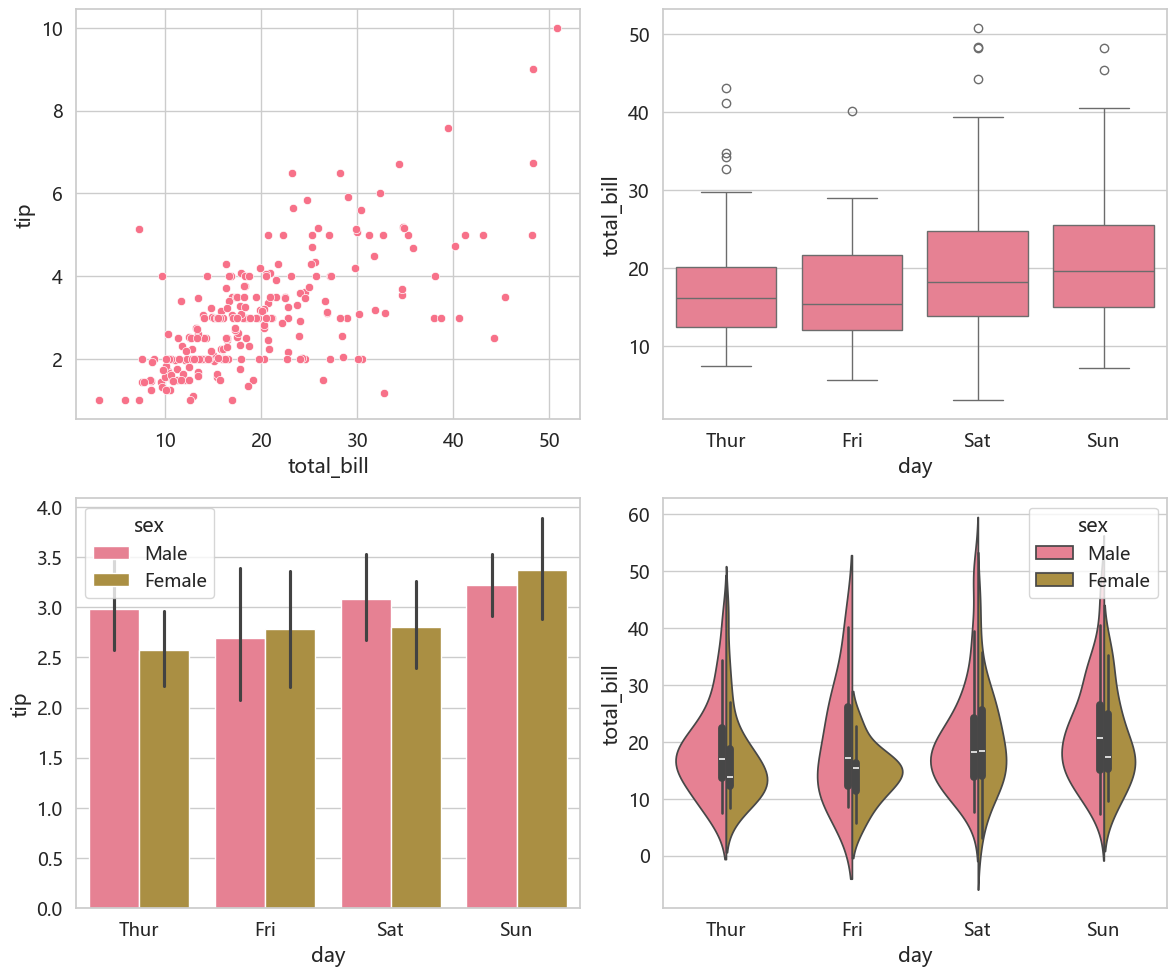

In [37]:
# 创建组合图形
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x="total_bill", y="tip", data=tips, ax=axes[0,0])
sns.boxplot(x="day", y="total_bill", data=tips, ax=axes[0,1])
sns.barplot(x="day", y="tip", hue="sex", data=tips, ax=axes[1,0])
sns.violinplot(x="day", y="total_bill", hue="sex", 
               data=tips, split=True, ax=axes[1,1])

plt.tight_layout()
plt.show()

#### 样式设置

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20041 (\N{CJK UNIFIED IDEOGRAPH-4E49}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

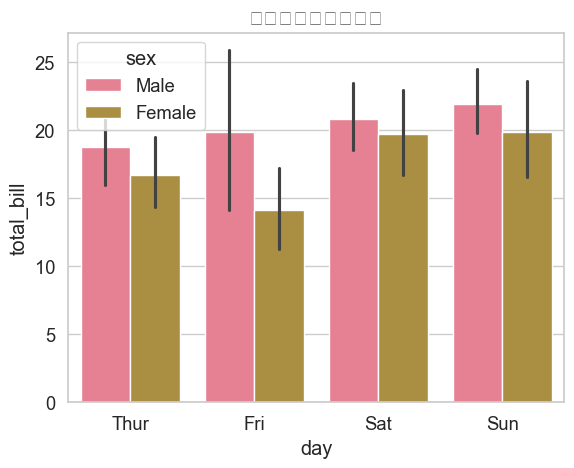

In [38]:
# 设置Seaborn样式
sns.set_style("whitegrid")
sns.set_palette("husl")

# 绘制带有样式的图形
sns.barplot(x="day", y="total_bill", hue="sex",
            data=tips)
plt.title("自定义样式的条形图")
plt.show()

### 03.分类-连续数据绘图

#### 分类数据可视化

##### 1. 条形图（展示分类变量的统计量）

C:\Users\Admin\AppData\Local\Temp\ipykernel_46188\1381764139.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="day", y="total_bill", data=tips,
C:\Users\Admin\AppData\Local\Temp\ipykernel_46188\1381764139.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day", y="total_bill", data=tips,
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Py

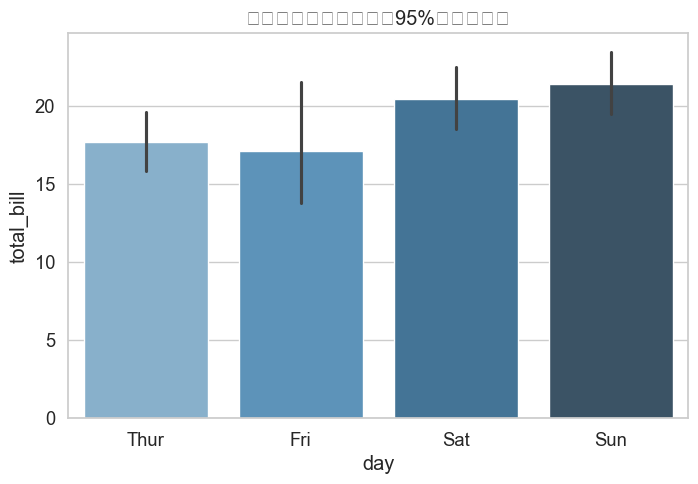

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

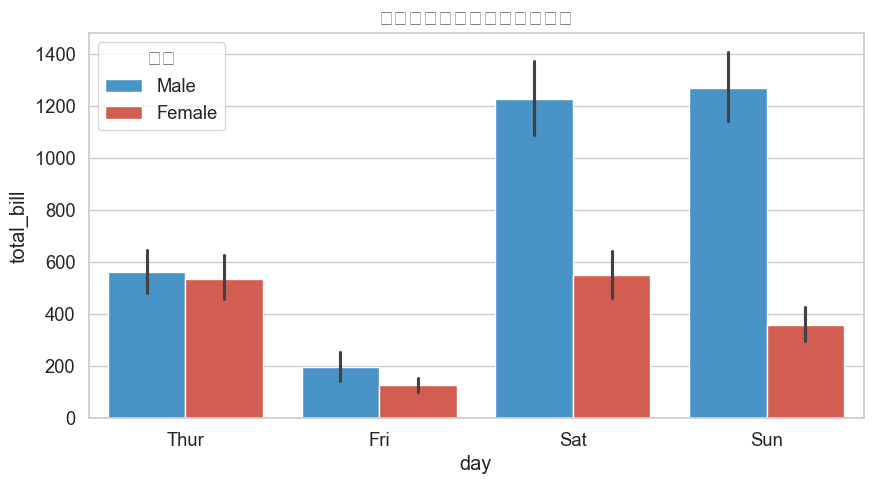

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据
tips = sns.load_dataset("tips")

# 基础条形图（展示每天平均账单金额）
plt.figure(figsize=(8,5))
sns.barplot(x="day", y="total_bill", data=tips, 
            ci=95,  # 95%置信区间
            palette="Blues_d")
plt.title("每日平均账单金额（含95%置信区间）")
plt.show()

# 分组条形图（按性别分组）
plt.figure(figsize=(10,5))
sns.barplot(x="day", y="total_bill", hue="sex",
            data=tips, palette=["#3498db", "#e74c3c"],
            estimator=sum)  # 改为显示总和
plt.title("按性别分组的每日账单总金额")
plt.legend(title="性别")
plt.show()

##### 2.条形分布图（展示类别频数）

C:\Users\Admin\AppData\Local\Temp\ipykernel_46188\2241631818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="day", data=tips,
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\

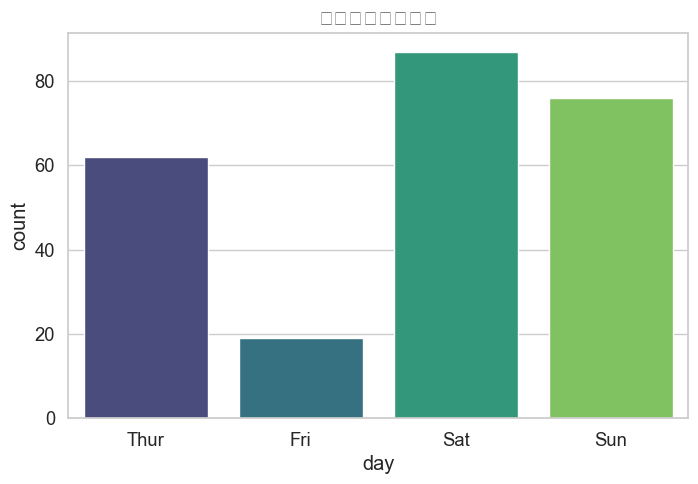

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39184 (\N{CJK UNIFIED IDEOGRAPH-9910}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

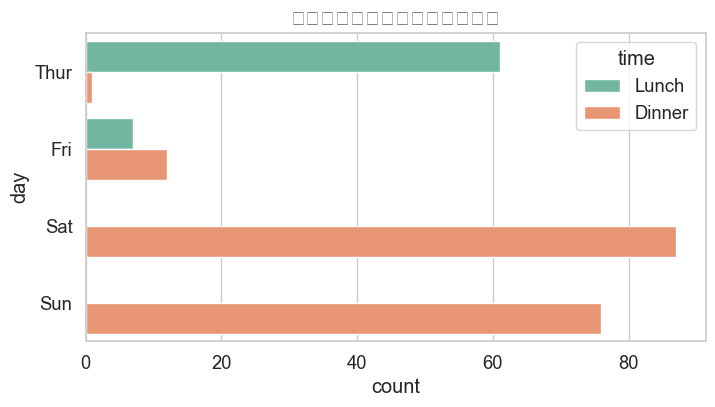

In [40]:
# 基础计数图
plt.figure(figsize=(8,5))
sns.countplot(x="day", data=tips, 
              palette="viridis")
plt.title("每日用餐次数统计")
plt.show()

# 水平计数图（改变方向）
plt.figure(figsize=(8,4))
sns.countplot(y="day", hue="time",
              data=tips, palette="Set2")
plt.title("按用餐时间分组的每日用餐次数")
plt.show()

##### 3.箱线图（展示数据分布）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

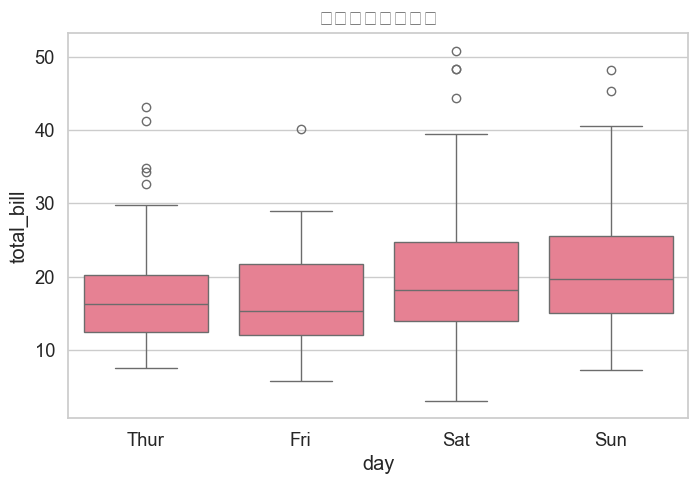

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

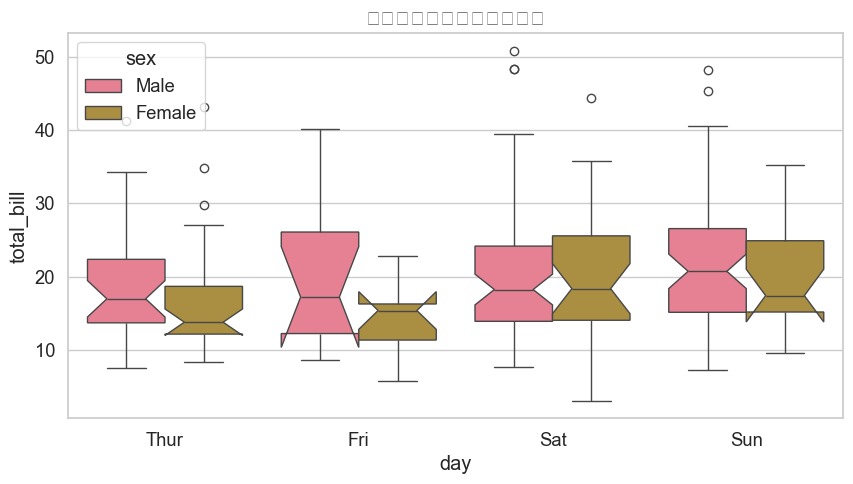

In [41]:
# 基础箱线图
plt.figure(figsize=(8,5))
sns.boxplot(x="day", y="total_bill", data=tips,
            whis=1.5)  # 调整异常值检测范围
plt.title("每日账单金额分布")
plt.show()

# 分组箱线图（添加缺口显示）
plt.figure(figsize=(10,5))
sns.boxplot(x="day", y="total_bill", hue="sex",
            data=tips, notch=True)  # 显示中位数置信区间缺口
plt.title("按性别分组的每日账单分布")
plt.show()

##### 4.小提琴图（展示分布密度）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

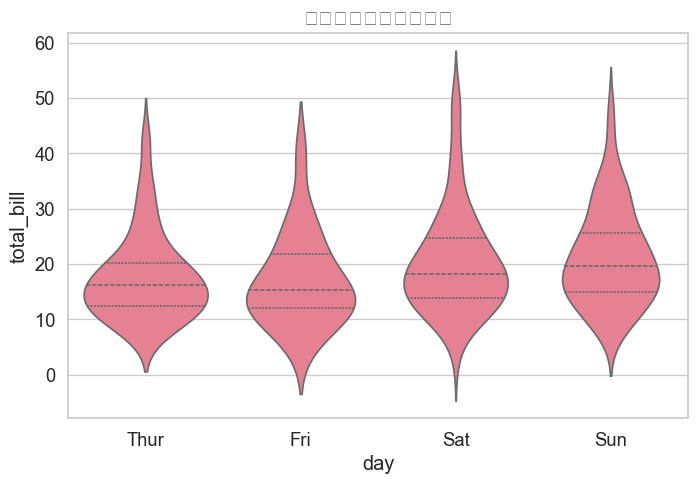

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

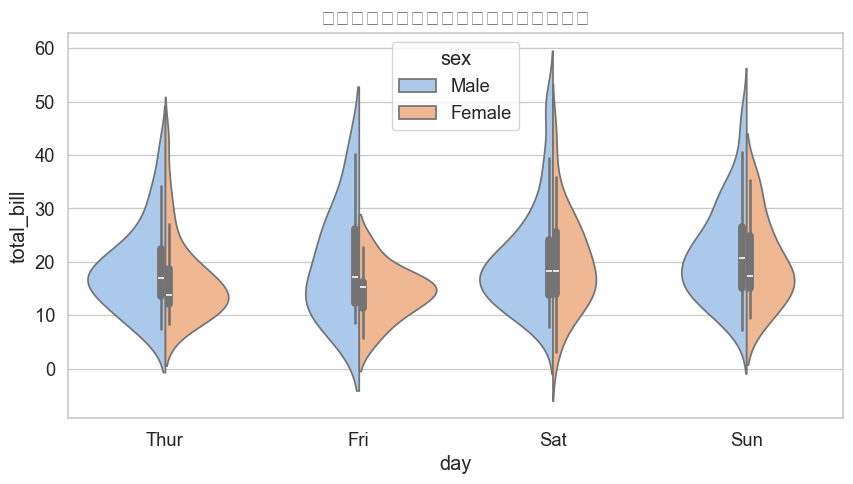

In [42]:
# 基础小提琴图
plt.figure(figsize=(8,5))
sns.violinplot(x="day", y="total_bill", data=tips,
               inner="quartile")  # 显示四分位数线
plt.title("每日账单金额分布形态")
plt.show()

# 分组小提琴图（拆分显示）
plt.figure(figsize=(10,5))
sns.violinplot(x="day", y="total_bill", hue="sex",
               data=tips, split=True,
               palette="pastel")
plt.title("按性别分组的每日账单分布（拆分视图）")
plt.show()

#### 连续数据可视化

##### 1.散点图（展示双变量关系）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

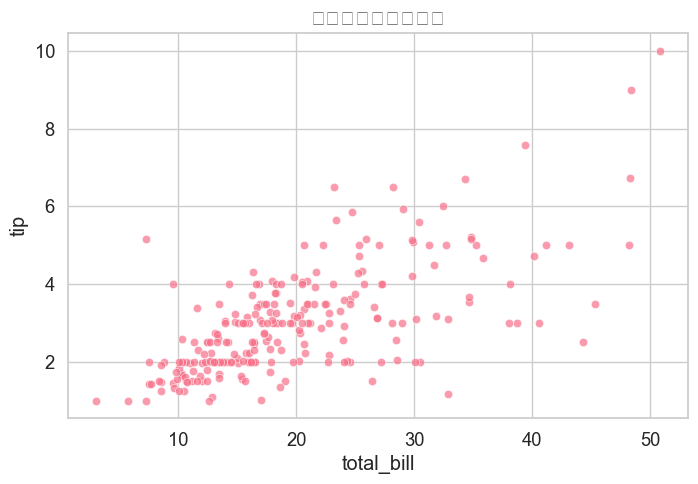

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

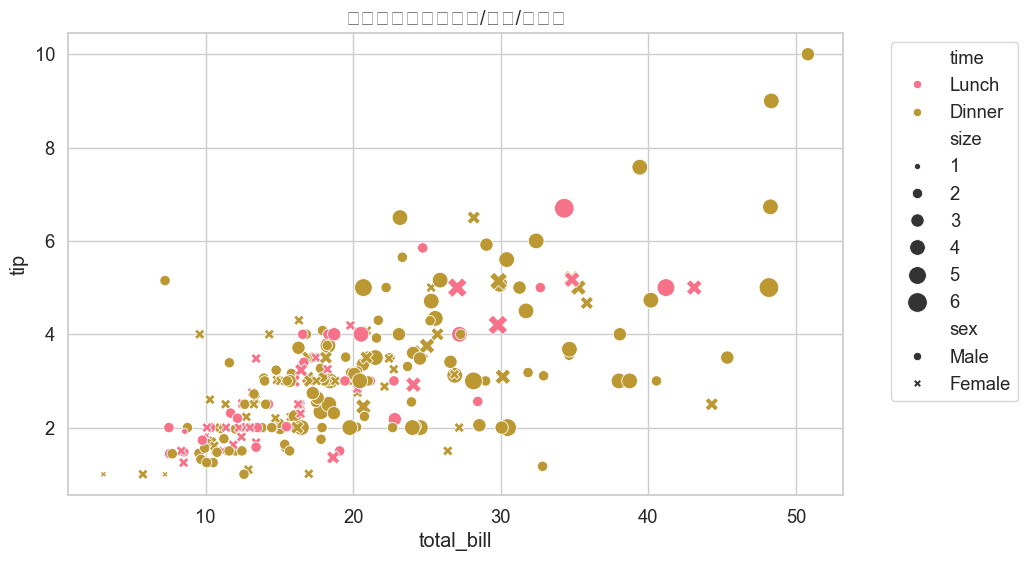

In [43]:
# 基础散点图
plt.figure(figsize=(8,5))
sns.scatterplot(x="total_bill", y="tip", 
                data=tips, alpha=0.7)
plt.title("账单金额与小费关系")
plt.show()

# 高级散点图（多维度展示）
plt.figure(figsize=(10,6))
sns.scatterplot(x="total_bill", y="tip", 
                hue="time", style="sex",
                size="size",  # 点的大小表示用餐人数
                data=tips, sizes=(20, 200))
plt.title("多维度散点图（时间/性别/人数）")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

##### 2.折线图（展示时间趋势）

C:\Users\Admin\AppData\Local\Temp\ipykernel_46188\3714566246.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x="year", y="passengers",
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33322 (\N{CJK UNIFIED IDEOGRAPH-822A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29677 (\N{CJK UNIFIED IDEOGRAPH-73ED}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20056 (\N{CJK UNIFIE

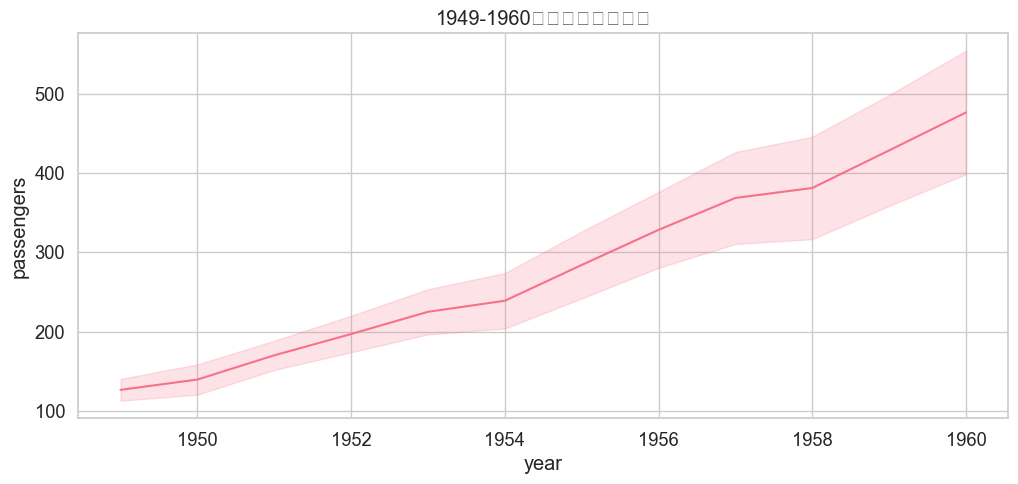

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20056 (\N{CJK UNIFIED IDEOGRAPH-4E58}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

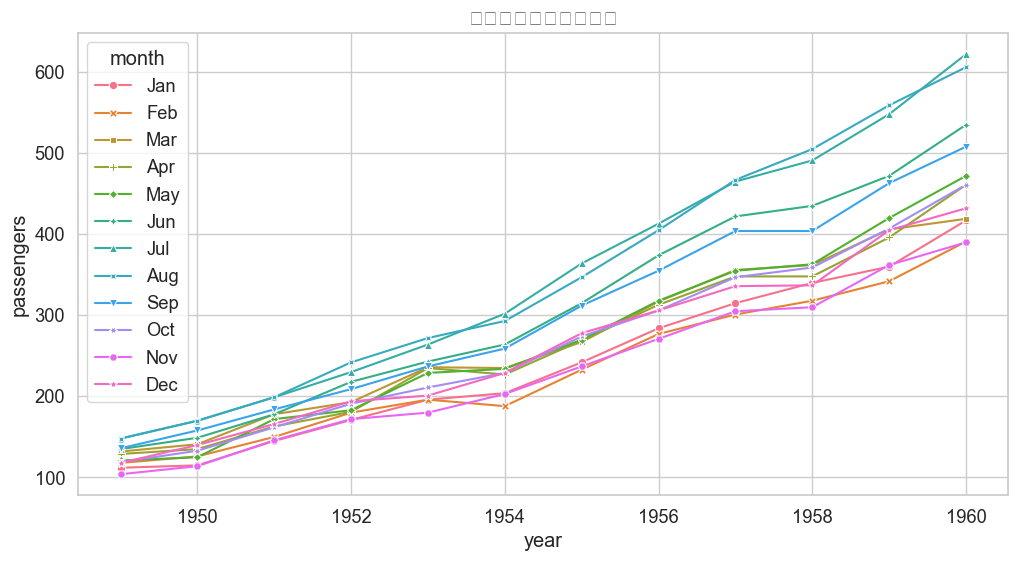

In [44]:
# 加载时间序列数据
flights = sns.load_dataset("flights")

# 基础折线图
plt.figure(figsize=(12,5))
sns.lineplot(x="year", y="passengers", 
             data=flights, ci="sd")  # 显示标准差
plt.title("1949-1960年航班乘客量变化")
plt.show()

# 多系列折线图
plt.figure(figsize=(12,6))
sns.lineplot(x="year", y="passengers", 
             hue="month", style="month",
             markers=True, dashes=False,
             data=flights)
plt.title("各月份乘客量年度变化")
plt.show()

##### 3.直方图与KDE（展示数据分布）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

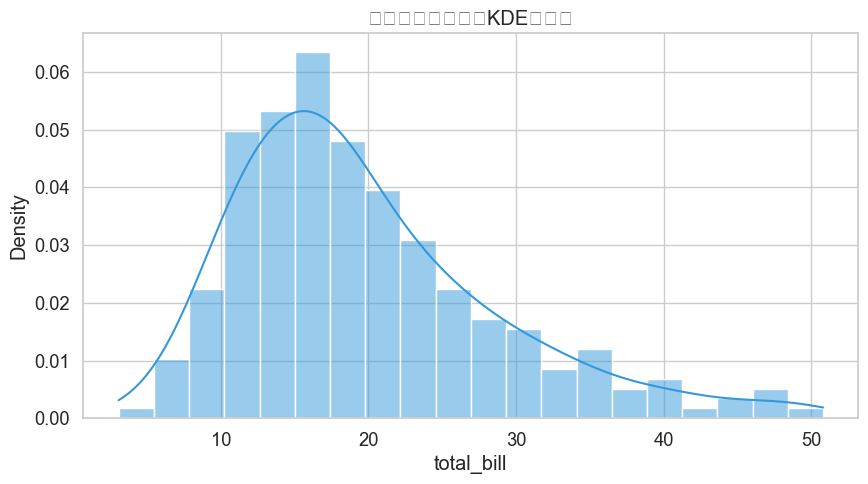

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21320 (\N{CJK UNIFIED IDEOGRAPH-5348}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39184 (\N{CJK UNIFIED IDEOGRAPH-9910}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26202 (\N{CJK UNIFIED IDEOGRAPH-665A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

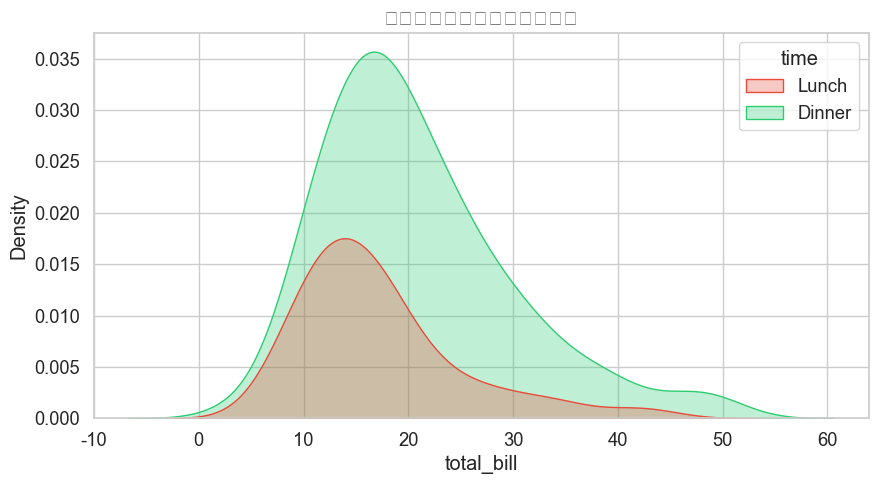

In [45]:
# 直方图与KDE组合
plt.figure(figsize=(10,5))
sns.histplot(data=tips, x="total_bill", bins=20,
             kde=True, stat="density",  # 显示密度而非计数
             color="#3498db")
plt.title("账单金额分布（带KDE曲线）")
plt.show()

# 分组KDE比较
plt.figure(figsize=(10,5))
sns.kdeplot(data=tips, x="total_bill", hue="time",
            fill=True, alpha=0.3,
            palette=["#e74c3c", "#2ecc71"])
plt.title("午餐与晚餐账单金额分布比较")
plt.show()

##### 4.成对图（多变量关系）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 40482 (\N{CJK UNIFIED IDEOGRAPH-9E22}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23614 (\N{CJK UNIFIED IDEOGRAPH-5C3E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

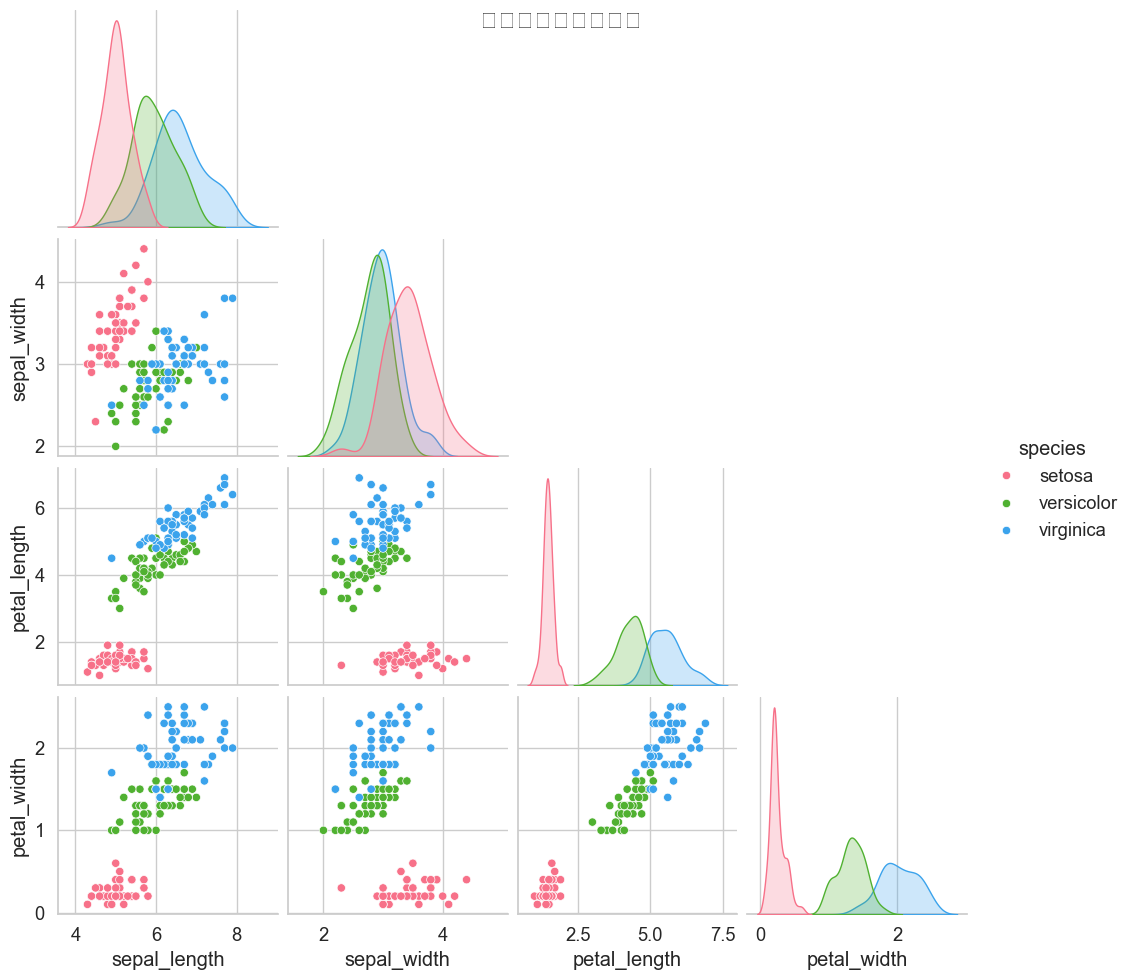

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20041 (\N{CJK UNIFIED IDEOGRAPH-4E49}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

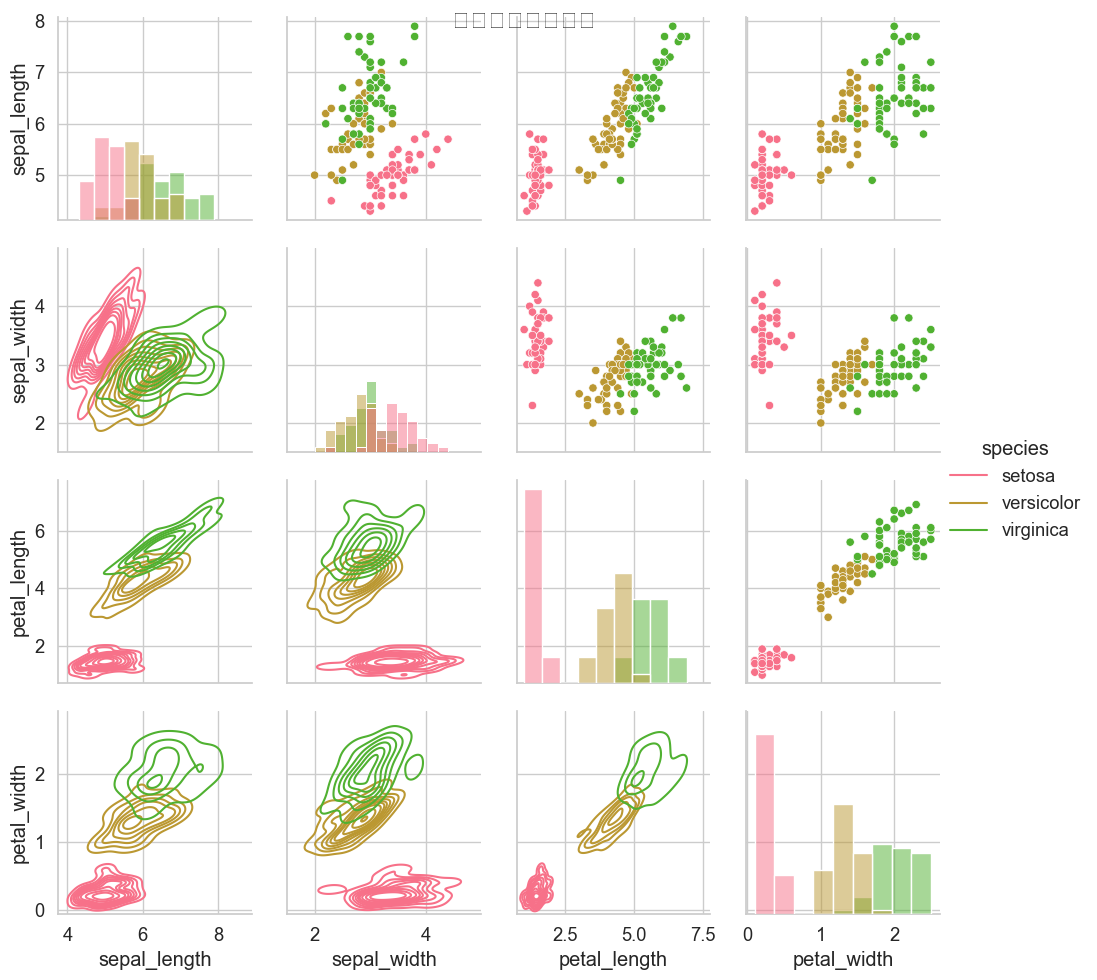

In [46]:
# 基础成对图
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species",
             palette="husl",
             corner=True)  # 只显示下三角
plt.suptitle("鸢尾花特征成对关系")
plt.show()

# 自定义成对图
g = sns.PairGrid(iris, hue="species")
g.map_upper(sns.scatterplot)  # 上三角散点图
g.map_lower(sns.kdeplot)      # 下三角KDE图
g.map_diag(sns.histplot)      # 对角线直方图
g.add_legend()
plt.suptitle("自定义成对关系图")
plt.show()

##### 5.热力图（展示矩阵数据）

In [47]:
# 相关性热力图
plt.figure(figsize=(8,6))
corr = tips.corr()
sns.heatmap(corr, annot=True, fmt=".2f",
            cmap="coolwarm", center=0)
plt.title("数值变量相关性热力图")
plt.show()

# 分面热力图示例
flights_pivot = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(10,6))
sns.heatmap(flights_pivot, annot=True, fmt="d",
            cmap="YlGnBu", linewidths=.5)
plt.title("1949-1960年各月份乘客量热力图")
plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 800x600 with 0 Axes>

##### 高级组合图表

##### 1.分面图（FacetGrid）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39069 (\N{CJK UNIFIED IDEOGRAPH-989D}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

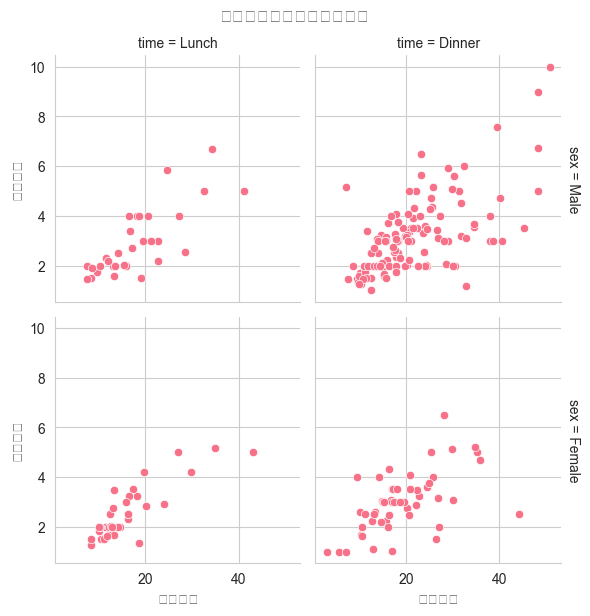

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

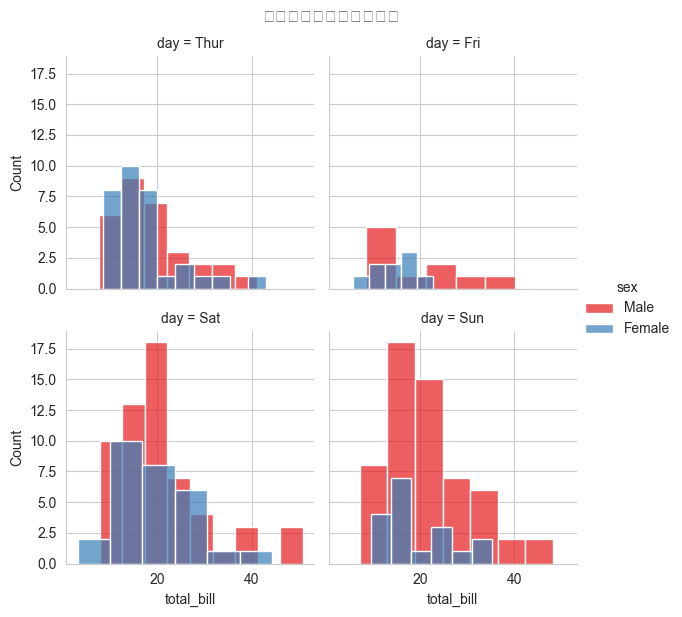

In [ ]:
# 散点图分面
g = sns.FacetGrid(tips, col="time", row="sex",
                  margin_titles=True)
g.map(sns.scatterplot, "total_bill", "tip")
g.set_axis_labels("账单金额", "小费金额")
plt.suptitle("按时间和性别分组的散点图", y=1.02)
plt.show()

# 直方图分面
g = sns.FacetGrid(tips, col="day", hue="sex",
                  palette="Set1", col_wrap=2)
g.map(sns.histplot, "total_bill", alpha=0.7)
g.add_legend()
plt.suptitle("按天分组的账单金额分布", y=1.02)
plt.show()

##### 2.组合图表（JointGrid）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

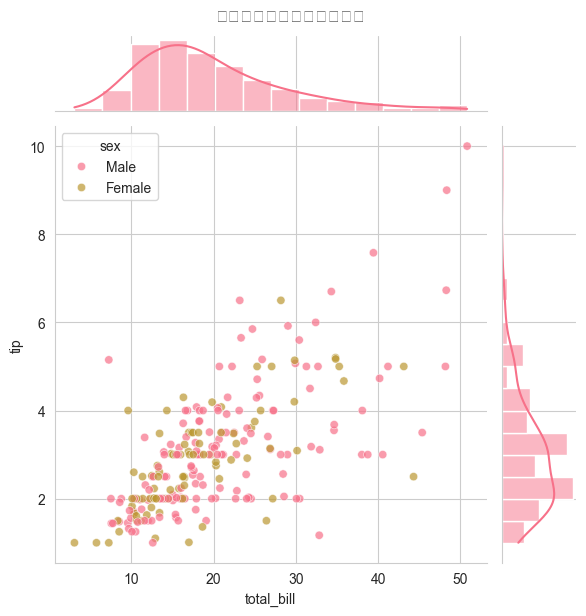

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

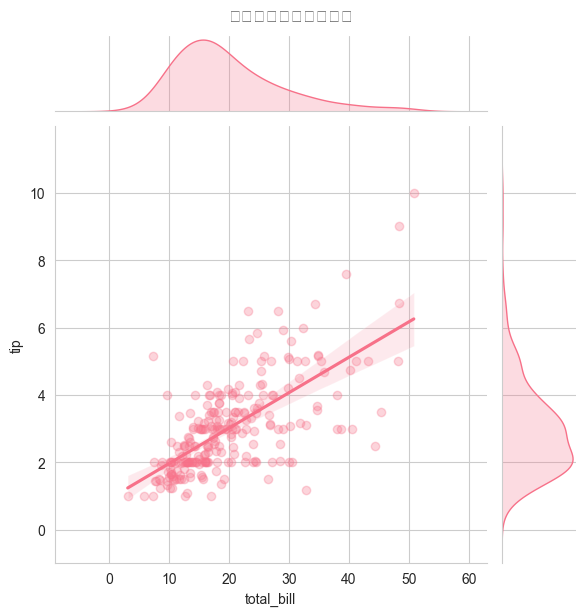

In [ ]:
# 散点图+直方图组合
g = sns.JointGrid(data=tips, x="total_bill", y="tip")
g.plot_joint(sns.scatterplot, hue=tips["sex"], alpha=0.7)
g.plot_marginals(sns.histplot, kde=True)
plt.suptitle("账单与小费关系的联合分布", y=1.02)
plt.show()

# 回归图+KDE组合
g = sns.JointGrid(data=tips, x="total_bill", y="tip")
g.plot_joint(sns.regplot, scatter_kws={"alpha":0.3})
g.plot_marginals(sns.kdeplot, fill=True)
plt.suptitle("账单与小费的回归关系", y=1.02)
plt.show()

##### 样式设置技巧

C:\Users\Admin\AppData\Local\Temp\ipykernel_46188\3923456972.py:8: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(x="day", y="total_bill", hue="sex",
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26143 (\N{CJK UNIFIED IDEOGRAPH-661F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtool

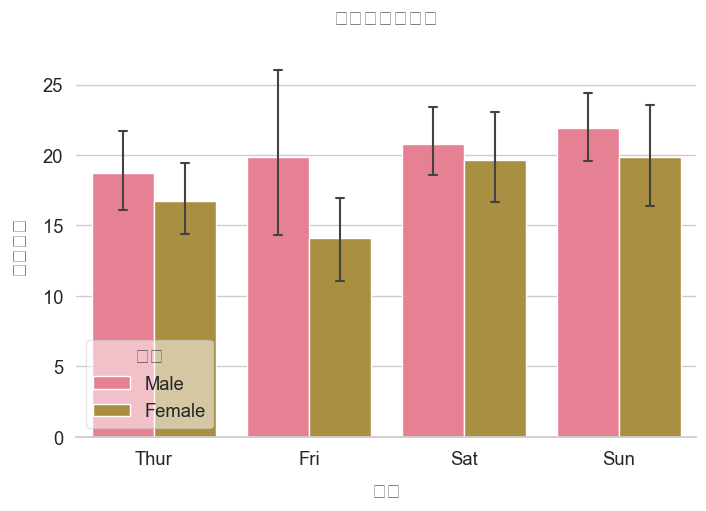

In [ ]:
# 设置全局样式
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.2)

# 应用样式的图表
plt.figure(figsize=(8,5))
sns.barplot(x="day", y="total_bill", hue="sex",
            data=tips, errwidth=1.5, capsize=0.1)
plt.title("自定义样式示例", pad=20)
plt.xlabel("星期", labelpad=10)
plt.ylabel("账单金额", labelpad=10)
plt.legend(title="性别", framealpha=0.5)
sns.despine(left=True)  # 移除左边框
plt.show()

### 04.多变量绘图

| 功能                  | 语法                                      | 描述                                                                 | 常用参数                                                                 |
|-----------------------|------------------------------------------|---------------------------------------------------------------------|--------------------------------------------------------------------------|
| **配对图 (Pairplot)** | `sns.pairplot(df, hue='category')`       | 展示多变量两两关系，探索相关性和分布                                | `hue`: 分组<br>`kind`: 图形类型<br>`corner`: 是否显示下半矩阵            |
| **联合图 (Jointplot)** | `sns.jointplot(x='col1', y='col2', data=df, kind='scatter')` | 展示双变量关系及分布                                      | `kind`: 图形类型<br>`hue`: 分组<br>`height`: 图形大小                   |
| **分面网格 (FacetGrid)** | `sns.FacetGrid(df, col='category').map(sns.scatterplot, 'x', 'y')` | 按分类变量分面绘制子图                                | `col/row`: 分面变量<br>`map()`: 绘图函数<br>`hue`: 分组                  |
| **热力图 (Heatmap)**  | `sns.heatmap(df.corr())`                | 可视化相关性矩阵                                                    | `annot`: 显示数值<br>`cmap`: 色板<br>`linewidths`: 网格线宽             |
| **散点图矩阵 (PairGrid)** | `sns.PairGrid(df).map_lower(sns.kdeplot).map_diag(sns.histplot)` | 定制化多变量关系矩阵                                  | `map_lower()`: 下半区函数<br>`map_diag()`: 对角线函数                   |
| **成对关系图**        | `sns.pairplot(df)`                      | 多变量散点图矩阵                                                    | `hue`: 分组<br>`corner`: 半矩阵显示<br>`plot_kws`: 绘图参数             |
| **分类分面图**        | `sns.FacetGrid(df, col='category').map(sns.boxplot, 'x', 'y')` | 分类变量分面比较                                    | `col/row`: 分类变量<br>`map()`: 箱线图函数                             |
| **雷达图**           | `sns.lineplot(data=df, polar=True)`     | 多维度比较                                                        | `polar=True`: 极坐标<br>`hue`: 分组<br>`style`: 线型                   |
| **堆积条形图**        | `sns.barplot(x='category', y='value', hue='sub_category', data=df)` | 展示多级分类占比                                  | `hue`: 子分类<br>`stack`: 堆积<br>`ci`: 误差范围                       |
| **三维散点图**        | `from mpl_toolkits.mplot3d import Axes3D`<br>`ax.scatter(xs, ys, zs)` | 三维空间数据分布                                  | `x/y/z`: 三维坐标<br>`c`: 颜色映射<br>`s`: 点大小                       |

##### 配对图（Pairplot）

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = sns.load_dataset('iris')

# 基础配对图
sns.pairplot(iris)
plt.suptitle('鸢尾花特征配对图', y=1.02)
plt.show()

# 按类别分组的配对图
sns.pairplot(iris, hue='species', 
            palette='husl',
            markers=['o', 's', 'D'],
            plot_kws={'alpha':0.7})
plt.suptitle('按品种分组的特征关系', y=1.02)
plt.show()

参数说明：

● `hue`：按品种分组着色<br>
● `palette`：设置调色板<br>
● `markers`：不同品种使用不同标记<br>
● `plot_kws`：传递给底层绘图函数的参数<br>

##### 联合图（Jointplot）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33852 (\N{CJK UNIFIED IDEOGRAPH-843C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

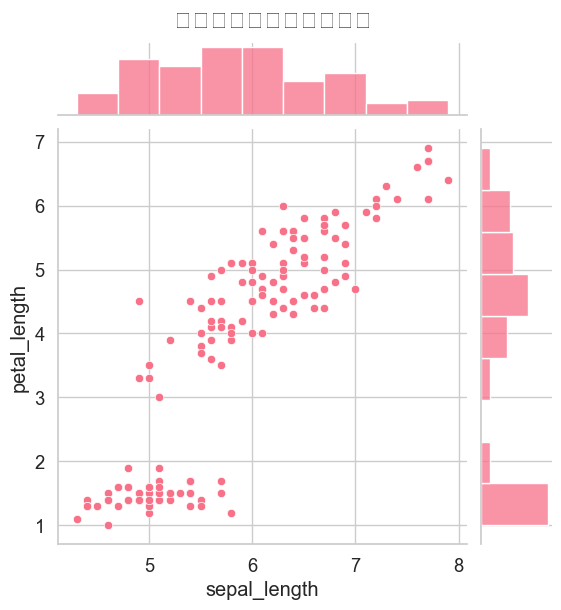

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

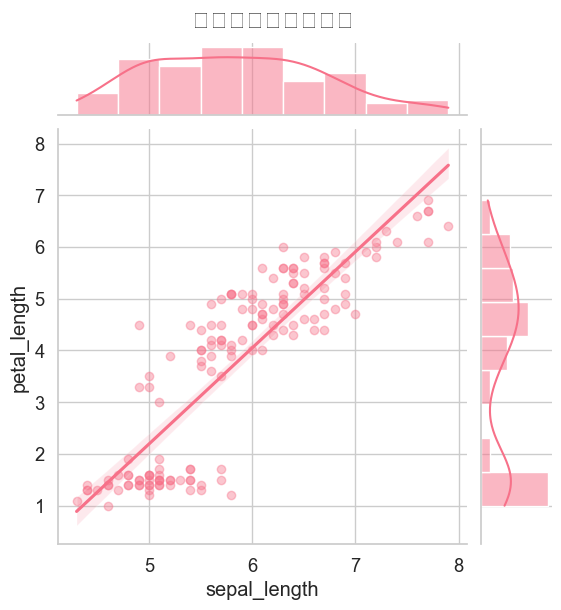

c:\Users\Admin\.conda\envs\DL\Lib\site-packages\seaborn\axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPyth

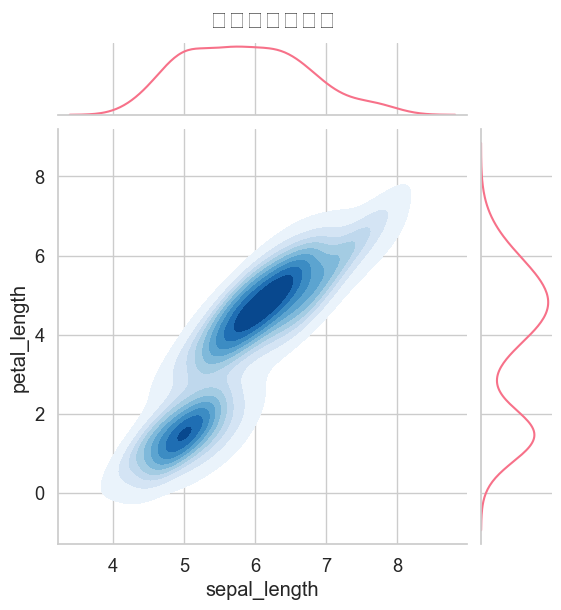

In [48]:
# 基础联合图（散点图+直方图）
sns.jointplot(x='sepal_length', y='petal_length', 
              data=iris, kind='scatter')
plt.suptitle('花萼长度与花瓣长度关系', y=1.02)
plt.show()

# 带回归线的联合图
sns.jointplot(x='sepal_length', y='petal_length',
              data=iris, kind='reg',
              scatter_kws={'alpha':0.4})
plt.suptitle('带回归线的联合分布', y=1.02)
plt.show()

# KDE联合图
sns.jointplot(x='sepal_length', y='petal_length',
              data=iris, kind='kde',
              shade=True, cmap='Blues')
plt.suptitle('密度估计联合图', y=1.02)
plt.show()

##### 分面网格（FacetGrid）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33852 (\N{CJK UNIFIED IDEOGRAPH-843C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

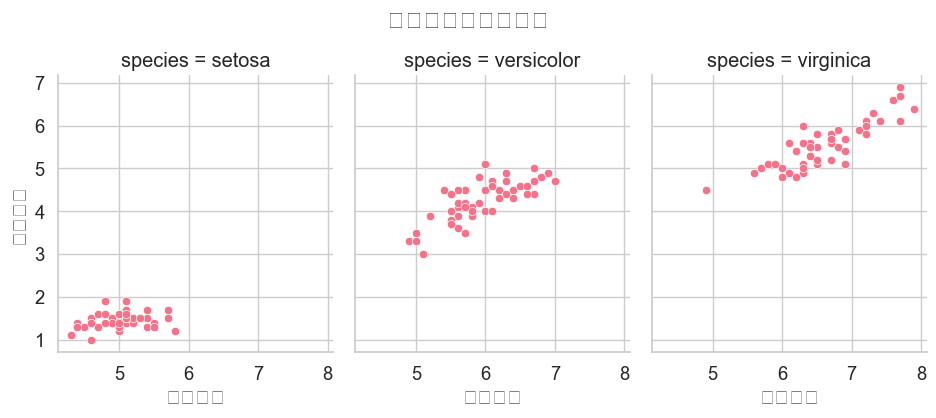

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

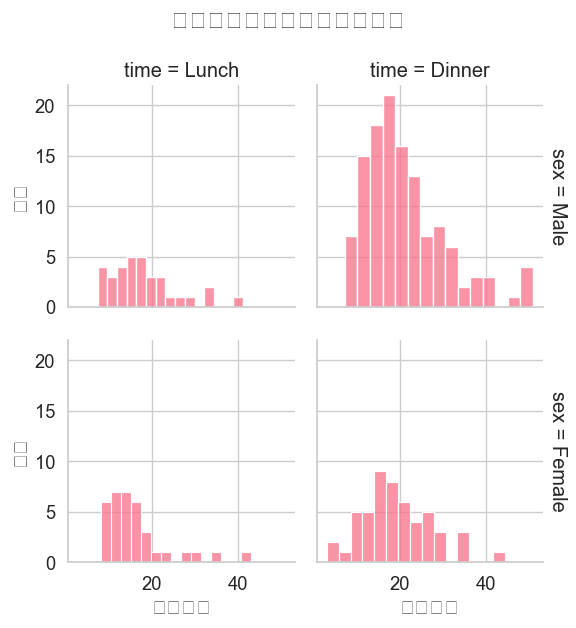

In [49]:
# 创建分面网格
g = sns.FacetGrid(iris, col='species', 
                  height=4, aspect=0.8)
g.map(sns.scatterplot, 'sepal_length', 'petal_length')
g.set_axis_labels('花萼长度', '花瓣长度')
plt.suptitle('按品种分组的散点图', y=1.05)
plt.show()

# 多维度分面
tips = sns.load_dataset('tips')
g = sns.FacetGrid(tips, row='sex', col='time',
                  margin_titles=True)
g.map(sns.histplot, 'total_bill', bins=15)
g.set_axis_labels('账单金额', '频数')
plt.suptitle('按性别和时间分组的小费分布', y=1.05)
plt.show()

##### 热力图（Heatmap）

In [50]:
# 相关性热力图
corr = iris.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f',
            cmap='coolwarm', center=0,
            linewidths=0.5)
plt.title('鸢尾花特征相关性热力图')
plt.show()

# 航班数据热力图
flights = sns.load_dataset('flights')
flights_pivot = flights.pivot('month', 'year', 'passengers')
plt.figure(figsize=(10,6))
sns.heatmap(flights_pivot, annot=True, fmt='d',
            cmap='YlGnBu', linewidths=0.5)
plt.title('1949-1960年各月份乘客量')
plt.show()

ValueError: could not convert string to float: 'setosa'

##### 散点图矩阵（PairGrid）

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20041 (\N{CJK UNIFIED IDEOGRAPH-4E49}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

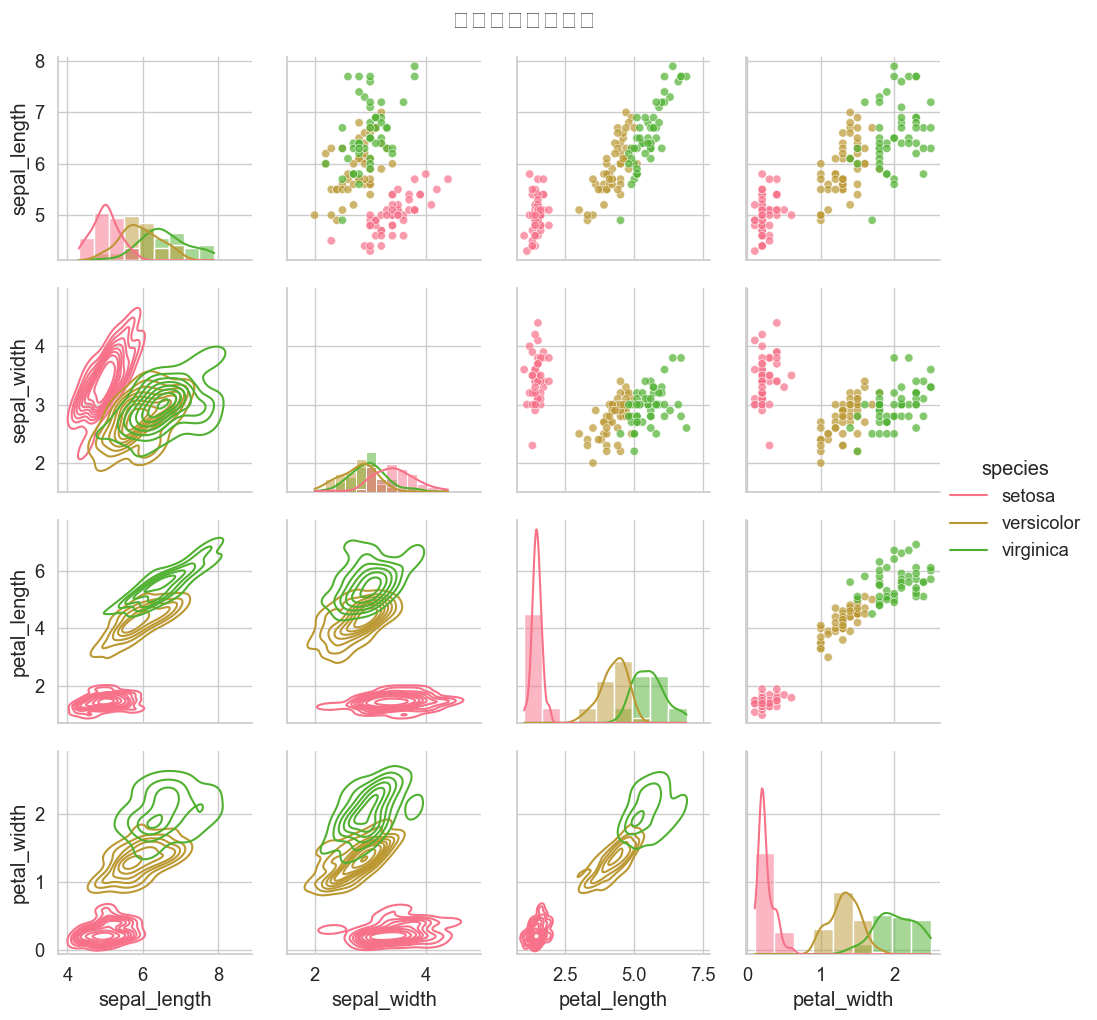

In [51]:
# 自定义散点图矩阵
g = sns.PairGrid(iris, hue='species')
g.map_upper(sns.scatterplot, alpha=0.7)  # 上三角散点图
g.map_lower(sns.kdeplot)                # 下三角密度图
g.map_diag(sns.histplot, kde=True)      # 对角线直方图
g.add_legend()
plt.suptitle('自定义散点图矩阵', y=1.02)
plt.show()

##### 分类分面图

In [ ]:
# 箱线图分面
plt.figure(figsize=(10,6))
g = sns.FacetGrid(tips, col='day', height=4, aspect=0.7)
g.map(sns.boxplot, 'sex', 'total_bill', order=['Male','Female'])
g.set_axis_labels('性别', '账单金额')
plt.suptitle('每日账单金额的性别差异', y=1.05)
plt.show()

##### 雷达图

In [ ]:
import numpy as np

# 准备雷达图数据
categories = iris.columns[:-1]
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
for species, group in iris.groupby('species'):
    values = group.mean()[:-1].tolist()
    values += values[:1]  # 闭合图形
    ax.plot(angles+angles[:1], values, 
            label=species, linewidth=2)
    ax.fill(angles+angles[:1], values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles), categories)
plt.title('鸢尾花品种特征雷达图')
plt.legend(loc='upper right')
plt.show()

##### 堆积条形图

In [ ]:
# 准备数据
df = tips.groupby(['day', 'sex'])['total_bill'].mean().unstack()

# 绘制堆积条形图
df.plot(kind='bar', stacked=True, 
        color=['#3498db', '#e74c3c'],
        figsize=(8,5))
plt.title('每日平均账单金额（按性别堆积）')
plt.ylabel('平均账单金额')
plt.xlabel('星期')
plt.legend(title='性别')
plt.show()

##### 三维散点图

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 创建3D图形
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# 按品种着色
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}
for species, group in iris.groupby('species'):
    ax.scatter(group['sepal_length'], 
               group['sepal_width'],
               group['petal_length'],
               c=colors[species],
               label=species,
               s=50, alpha=0.7)

ax.set_xlabel('花萼长度')
ax.set_ylabel('花萼宽度')
ax.set_zlabel('花瓣长度')
plt.title('鸢尾花特征三维散点图')
plt.legend()
plt.show()

##### 高级技巧：组合图表

In [ ]:
# 创建组合图表
plt.figure(figsize=(12,10))

# 热力图
plt.subplot(221)
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')

# 联合图
plt.subplot(222)
sns.jointplot(x='sepal_length', y='petal_length', 
              data=iris, kind='kde')

# 分面图
plt.subplot(223)
g = sns.FacetGrid(iris, col='species')
g.map(sns.boxplot, 'sepal_length')

# 配对图
plt.subplot(224)
sns.pairplot(iris, hue='species')

plt.tight_layout()
plt.show()

### 05.高级绘图

| 章节               | 知识点                     | 常用函数/方法                     | 描述/用途                                                                 |
|--------------------|---------------------------|-----------------------------------|--------------------------------------------------------------------------|
| **回归分析**       | 回归图                    | `sns.regplot()`                  | 绘制散点图并添加回归线，展示数据的线性关系                                |
|                    | 回归类型（线性回归、岭回归等） | `sns.regplot()`                 | 在回归图上进行不同类型的回归分析，拟合趋势线                            |
|                    | 残差图                    | `sns.residplot()`               | 展示回归模型的残差，评估回归模型拟合效果                                |
|                    | 回归回调                  | `sns.lmplot()`                  | 结合回归模型与分类数据的分组展示                                        |
| **统计图表进阶**   | 条形分布图                | `sns.countplot()`               | 显示分类数据的频数分布                                                  |
|                    | 分布图（直方图与KDE）     | `sns.histplot()`, `sns.kdeplot()` | 展示数据分布情况，分别用于直方图和核密度估计                            |
|                    | 成对关系图                | `sns.pairplot()`                | 展示多变量间的成对关系（散点图+分布图）                                 |
|                    | 联合图                    | `sns.jointplot()`               | 同时显示双变量的散点图、分布图及其关系                                  |
| **高级绘图技巧**   | 分面网格                  | `sns.FacetGrid()`               | 按类别变量绘制多个子图                                                  |
|                    | 图形定制                  | `plt.title()`, `plt.xlabel()`, `plt.ylabel()`, `plt.legend()` | 定制图表标题、坐标轴标签和图例                                          |
|                    | 图形标注与注释            | `plt.text()`, `sns.annotate()`   | 添加文字标注和数据点注释                                                |
|                    | 图形保存                  | `plt.savefig()`                 | 将图形保存为图像文件（PNG/PDF/SVG）                                     |
|                    | 控制轴范围与比例          | `plt.xlim()`, `plt.ylim()`      | 自定义坐标轴显示范围                                                    |
|                    | 绘制多子图                | `plt.subplots()`                | 在一个画布上创建多个子图                                                |
|                    | 颜色映射与色条            | `sns.heatmap()`, `sns.color_palette()` | 创建热力图和控制颜色渐变                                                |
|                    | 自定义坐标轴              | `plt.gca()`, `ax.set_*()`       | 通过gca获取当前坐标轴，定制坐标轴属性                                   |

#### 回归分析可视化

##### 1.基础回归图

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 加载示例数据
tips = sns.load_dataset("tips")

# 绘制基础回归图
plt.figure(figsize=(8,5))
sns.regplot(x="total_bill", y="tip", data=tips,
            scatter_kws={"alpha":0.4, "color":"#3498db"},
            line_kws={"color":"#e74c3c", "linewidth":2})
plt.title("账单金额与小费的线性关系", pad=15)
plt.xlabel("账单金额($)")
plt.ylabel("小费金额($)")
plt.grid(True, alpha=0.3)
plt.show()

##### 2.带置信区间的回归图

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x="total_bill", y="tip", data=tips,
            ci=99,  # 99%置信区间
            marker="+",
            scatter_kws={"alpha":0.5})
plt.title("带99%置信区间的回归图", pad=15)
plt.show()

##### 3.残差分析图

In [ ]:
plt.figure(figsize=(8,5))
sns.residplot(x="total_bill", y="tip", data=tips,
               lowess=True,  # 显示局部加权回归线
               line_kws={"color": "red", "lw": 1})
plt.title("回归残差图", pad=15)
plt.xlabel("账单金额($)")
plt.ylabel("残差")
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

##### 4.分组回归图

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(x="total_bill", y="tip", hue="time",
           data=tips, palette=["#3498db", "#e74c3c"],
           height=5, aspect=1.5,
           markers=["o", "x"])
plt.suptitle("午餐与晚餐时段的回归关系", y=1.02)
plt.xlabel("账单金额($)")
plt.ylabel("小费金额($)")
plt.show()

#### 4.统计图表进阶

##### 1.条形分布图（Countplot）

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="day", data=tips,
                   palette="viridis",
                   order=["Thur", "Fri", "Sat", "Sun"])  # 自定义顺序
plt.title("每日用餐次数统计", pad=15)

# 添加数值标签
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

##### 2.布图组合（直方图+KDE）

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=tips, x="total_bill", bins=20,
             kde=True,  # 同时显示KDE曲线
             stat="density",  # 显示密度而非计数
             color="#3498db",
             edgecolor="white")
plt.title("账单金额分布（带核密度估计）", pad=15)
plt.xlabel("账单金额($)")
plt.grid(True, alpha=0.3)
plt.show()

##### 3.成对关系图（Pairplot）

In [ ]:
# 自定义对角线和非对角线图形
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species",
                 diag_kind="hist",  # 对角线显示直方图
                 plot_kws={"alpha":0.7, "s":15},
                 corner=True)  # 只显示下三角
g.fig.suptitle("鸢尾花特征成对关系", y=1.02)
plt.show()

##### 4.高级联合图（Jointplot）

In [ ]:
# 六边形分箱图+边际KDE
plt.figure(figsize=(8,6))
sns.jointplot(x="total_bill", y="tip", data=tips,
              kind="hex",  # 六边形分箱
              marginal_kws={"bins":15, "kde":True},
              height=7)
plt.suptitle("账单与小费的联合分布（六边形分箱）", y=1.02)
plt.show()

#### 高级绘图技巧

##### 1.分面网格（FacetGrid）

# 创建分面网格
g = sns.FacetGrid(tips, col="day", row="sex",
                  margin_titles=True,
                  height=3.5, aspect=1.2)

# 映射散点图
g.map(sns.scatterplot, "total_bill", "tip", alpha=0.7)

# 添加回归线
g.map(sns.regplot, "total_bill", "tip", scatter=False, color="red")

# 设置标签
g.set_axis_labels("账单金额($)", "小费金额($)")
g.fig.suptitle("按性别和日期分组的小费分析", y=1.05)
plt.show()

##### 2.图形标注与注释

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

# 标注离群点
outlier = tips.nlargest(1, "tip")
ax.annotate(f"异常高小费: ${outlier['tip'].values[0]:.2f}",
            xy=(outlier["total_bill"], outlier["tip"]),
            xytext=(15, 15), textcoords="offset points",
            arrowprops=dict(arrowstyle="->"))

plt.title("账单与小费关系（带异常值标注）", pad=15)
plt.show()

##### 3.多子图组合

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# 子图1: 回归图
sns.regplot(x="total_bill", y="tip", data=tips, ax=axes[0,0])
axes[0,0].set_title("回归分析")

# 子图2: 箱线图
sns.boxplot(x="day", y="total_bill", data=tips, ax=axes[0,1])
axes[0,1].set_title("每日账单分布")

# 子图3: KDE图
sns.kdeplot(data=tips, x="total_bill", ax=axes[1,0])
axes[1,0].set_title("账单金额密度")

# 子图4: 计数图
sns.countplot(x="size", data=tips, ax=axes[1,1])
axes[1,1].set_title("用餐人数统计")

plt.suptitle("多维度数据分析", y=1.02)
plt.tight_layout()
plt.show()

##### 4.自定义颜色与样式

In [ ]:
# 设置全局样式
sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(10,6))
sns.barplot(x="day", y="total_bill", hue="sex",
            data=tips, errwidth=1, capsize=0.1,
            saturation=0.8)

# 自定义图例
plt.legend(title="性别", frameon=True, shadow=True)

# 坐标轴美化
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title("自定义样式的条形图", pad=20)
plt.show()